# Creating Equal Weighted Portfolio

In [83]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [84]:
port = pd.DataFrame()
tickers = ['INCO.jk', 'AMRT.jk', 'APIC.jk', 'ITMG.jk', 'MEDC.jk', 'HEXA.jk', 'MFIN.jk', 'MPMX.jk', 'BSSR.jk', 'BFIN.jk', 'UNTR.jk', 'ARNA.jk', 'UNTR.jk','ADMF.jk','MBAP.jk','MTDL.jk','ADRO.jk','SRTG.jk','INDF.jk', 'BYAN.jk']
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2018-04-01', end = '2023-03-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [85]:
port.head()

,INCO.jk,AMRT.jk,APIC.jk,ITMG.jk,MEDC.jk,HEXA.jk,MFIN.jk,MPMX.jk,BSSR.jk,BFIN.jk,UNTR.jk,ARNA.jk,ADMF.jk,MBAP.jk,MTDL.jk,ADRO.jk,SRTG.jk,INDF.jk,BYAN.jk
Date,,,,,,,,,,,,,,,,,,,
2018-04-02,2843.382324,554.181335,510.0,12491.970703,976.985168,1312.472778,670.281311,332.100250,1043.853882,629.335693,25747.511719,240.424942,5261.391113,1715.627197,143.795273,1383.886475,729.520508,6033.260742,750.999695
2018-04-03,2972.176514,549.444702,510.0,12580.584961,961.034485,1312.472778,672.246887,332.100250,1012.760376,641.209961,25707.466797,253.618988,5335.495117,1688.651855,142.885193,1377.389404,720.536255,5869.090332,750.999695
2018-04-04,2952.362061,544.708069,510.0,12265.778320,913.182129,1312.472778,670.281311,325.912018,999.434570,645.168091,25627.382812,247.754944,5335.495117,1688.651855,140.154907,1325.412354,745.692139,5910.133789,750.999695
2018-04-05,2952.362061,549.444702,498.0,12778.795898,929.132935,1277.473145,676.178162,330.037506,1043.853882,637.251892,25787.556641,247.754944,5394.778809,1710.232178,141.975082,1312.418335,743.895325,5848.569824,750.999695
2018-04-06,2922.640381,539.971497,498.0,12778.795898,941.095947,1343.096924,674.212585,346.539368,1008.318542,629.335693,25787.556641,247.754944,5379.957520,1694.046997,141.975082,1318.915283,742.098389,5828.047852,750.999695


## Getting Daily Return of The data

In [86]:
ret = port.pct_change().dropna()
ret.head()

,INCO.jk,AMRT.jk,APIC.jk,ITMG.jk,MEDC.jk,HEXA.jk,MFIN.jk,MPMX.jk,BSSR.jk,BFIN.jk,UNTR.jk,ARNA.jk,ADMF.jk,MBAP.jk,MTDL.jk,ADRO.jk,SRTG.jk,INDF.jk,BYAN.jk
Date,,,,,,,,,,,,,,,,,,,
2018-04-03,0.045296,-0.008547,0.000000,0.007094,-0.016326,0.000000,0.002932,0.000000,-0.029787,0.018868,-0.001555,0.054878,0.014084,-0.015723,-0.006329,-0.004695,-0.012315,-0.027211,0.0
2018-04-04,-0.006667,-0.008621,0.000000,-0.025023,-0.049793,0.000000,-0.002924,-0.018634,-0.013158,0.006173,-0.003115,-0.023121,0.000000,0.000000,-0.019108,-0.037736,0.034913,0.006993,0.0
2018-04-05,0.000000,0.008696,-0.023529,0.041825,0.017467,-0.026667,0.008798,0.012658,0.044444,-0.012270,0.006250,0.000000,0.011111,0.012780,0.012987,-0.009804,-0.002410,-0.010417,0.0
2018-04-06,-0.010067,-0.017241,0.000000,0.000000,0.012875,0.051370,-0.002907,0.050000,-0.034042,-0.012422,0.000000,0.000000,-0.002747,-0.009464,0.000000,0.004950,-0.002416,-0.003509,0.0
2018-04-09,0.023729,-0.008772,0.000000,0.000912,0.055085,-0.016287,0.000000,-0.053571,-0.004405,0.006289,0.070652,0.018405,-0.002755,0.012739,0.012820,0.019704,0.016949,0.010563,0.0


## Getting The Number of Assets & Weight of Each Assets

In [87]:
no_assets = len(port.columns)
no_assets

19

In [88]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842]

## Calculating Daily Return of Each Stocks Based on It's Weight

In [89]:
ret.mul(weights, axis = 1).sum(axis = 1)

Date
2018-04-03    0.001088
2018-04-04   -0.008412
2018-04-05    0.004838
2018-04-06    0.001283
2018-04-09    0.008529
                ...   
2023-03-24    0.007638
2023-03-27    0.005765
2023-03-28    0.014629
2023-03-29    0.013877
2023-03-30   -0.001462
Length: 1248, dtype: float64

### Calculating Using Simple "dot" Method

In [90]:
ret.dot(weights)

Date
2018-04-03    0.001088
2018-04-04   -0.008412
2018-04-05    0.004838
2018-04-06    0.001283
2018-04-09    0.008529
                ...   
2023-03-24    0.007638
2023-03-27    0.005765
2023-03-28    0.014629
2023-03-29    0.013877
2023-03-30   -0.001462
Length: 1248, dtype: float64

### Creating  a Equal Weighted Portfolio Return

In [91]:
ret['EWP'] = ret.dot(weights)
ret.head()

,INCO.jk,AMRT.jk,APIC.jk,ITMG.jk,MEDC.jk,HEXA.jk,MFIN.jk,MPMX.jk,BSSR.jk,BFIN.jk,UNTR.jk,ARNA.jk,ADMF.jk,MBAP.jk,MTDL.jk,ADRO.jk,SRTG.jk,INDF.jk,BYAN.jk,EWP
Date,,,,,,,,,,,,,,,,,,,,
2018-04-03,0.045296,-0.008547,0.000000,0.007094,-0.016326,0.000000,0.002932,0.000000,-0.029787,0.018868,-0.001555,0.054878,0.014084,-0.015723,-0.006329,-0.004695,-0.012315,-0.027211,0.0,0.001088
2018-04-04,-0.006667,-0.008621,0.000000,-0.025023,-0.049793,0.000000,-0.002924,-0.018634,-0.013158,0.006173,-0.003115,-0.023121,0.000000,0.000000,-0.019108,-0.037736,0.034913,0.006993,0.0,-0.008412
2018-04-05,0.000000,0.008696,-0.023529,0.041825,0.017467,-0.026667,0.008798,0.012658,0.044444,-0.012270,0.006250,0.000000,0.011111,0.012780,0.012987,-0.009804,-0.002410,-0.010417,0.0,0.004838
2018-04-06,-0.010067,-0.017241,0.000000,0.000000,0.012875,0.051370,-0.002907,0.050000,-0.034042,-0.012422,0.000000,0.000000,-0.002747,-0.009464,0.000000,0.004950,-0.002416,-0.003509,0.0,0.001283
2018-04-09,0.023729,-0.008772,0.000000,0.000912,0.055085,-0.016287,0.000000,-0.053571,-0.004405,0.006289,0.070652,0.018405,-0.002755,0.012739,0.012820,0.019704,0.016949,0.010563,0.0,0.008529


## Creating Summary Return of The Portfolio

In [92]:
ret.agg(['mean', 'std']).T

,mean,std
INCO.jk,0.001130,0.030239
AMRT.jk,0.001677,0.027058
APIC.jk,0.000809,0.015716
ITMG.jk,0.001168,0.028058
MEDC.jk,0.000602,0.034935
HEXA.jk,0.001313,0.020966
MFIN.jk,0.000994,0.022725
MPMX.jk,0.001425,0.028171
BSSR.jk,0.001624,0.033136
BFIN.jk,0.001003,0.029270


In [93]:
summary = ret.agg(['mean', 'std']).T

### Renaming columng to "return" and "risk"

In [94]:
summary.columns = ['return', 'risk']
summary.head()

,return,risk
INCO.jk,0.001130,0.030239
AMRT.jk,0.001677,0.027058
APIC.jk,0.000809,0.015716
ITMG.jk,0.001168,0.028058
MEDC.jk,0.000602,0.034935


### Annualizing Summary Data

In [95]:
summary['return'] = summary['return'] * 250
summary['risk'] = summary['risk'] * 250**0.5

In [96]:
summary.head()

,return,risk
INCO.jk,0.282378,0.478119
AMRT.jk,0.419133,0.427828
APIC.jk,0.202286,0.248486
ITMG.jk,0.291980,0.443643
MEDC.jk,0.150568,0.552376


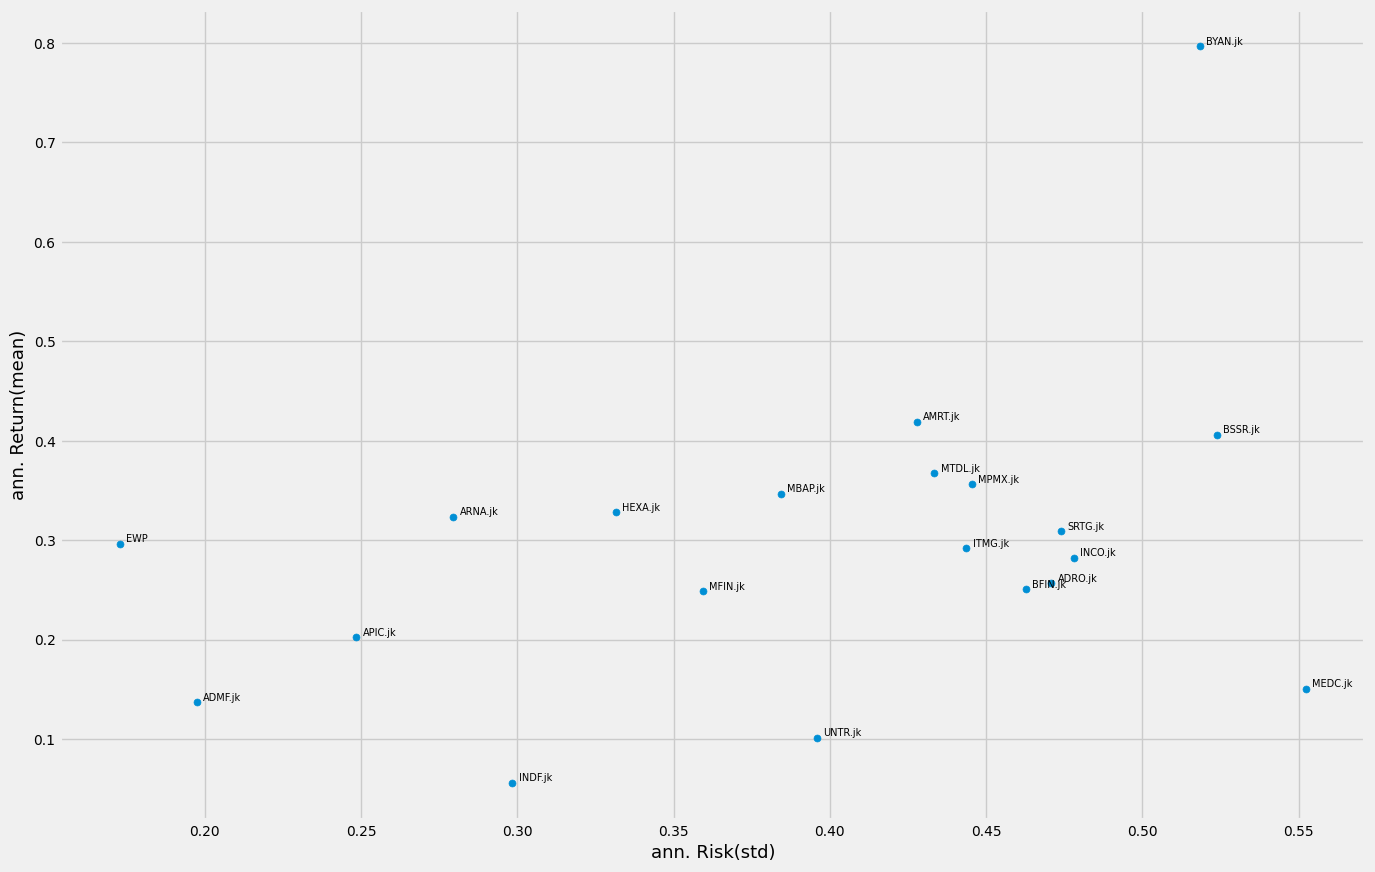

In [97]:
summary.plot(kind = 'scatter', x='risk', y='return', figsize = (15,10), s = 25, fontsize = 10)
for i in summary.index : 
    plt.annotate(i, xy = (summary.loc[i, 'risk'] + 0.002, summary.loc[i, 'return'] + 0.002), size = 7)
plt.xlabel('ann. Risk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.show()

# Appendix

## Function to Calculate Annual Return

In [98]:
def annual_return(return_df) : 
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    return summary
    

In [99]:
annual_return(ret)

,return,risk
INCO.jk,0.282378,0.478119
AMRT.jk,0.419133,0.427828
APIC.jk,0.202286,0.248486
ITMG.jk,0.291980,0.443643
MEDC.jk,0.150568,0.552376
HEXA.jk,0.328193,0.331509
MFIN.jk,0.248591,0.359311
MPMX.jk,0.356179,0.445415
BSSR.jk,0.406111,0.523921
BFIN.jk,0.250686,0.462802
